### Tensorflow Basics 

Tensorflow is a graph-based numerical computation library. Complex mathematical operations are described in a graph-like data structure, where nodes in the graph represent the mathematical operations, and connections between nodes represent the flow of data from operation to operation. In Tensorflow, these data are held as **tensor** objects, which is just a generalization of a matrix. 

![tf-graph](https://www.tensorflow.org/images/getting_started_add.png)

We will be using the Python API to access Tensorflow's data structures and functions, which are implemented in a C++ backend. 

A Tensorflow program can be divided into two essential parts: 

1. Building a computational graph

2. Launching and running the computational graph

A **computational graph** is just a series of mathematical operations defined on some data, which we can easily create in Tensorflow. Let's create our first tensorflow program!

In [2]:
# import our essential libraries
import tensorflow as tf # we can access tensorflow with "tf" now
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
a = tf.constant(3.0)
b = tf.constant(4.0)

In [4]:
print(a)
print(b)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)


Printing out the nodes does not produce the values that you may have expected. This is because Tensorflow only evaluates variables and runs operations in the context of a `session`. 

In [5]:
sess = tf.InteractiveSession()
print(sess.run([a, b]))

[3.0, 4.0]


Let's learn a little more about Tensorflow's graph-based computations.

In [9]:
a = tf.constant(3.0)
b = tf.constant(4.0)
#s = tf.multiply(a, b) # shortcut is just a * b
print(sess.run(s))

12.0


Exercise: Create constants and use Tensorflow's add, multiply, and subtract functions to evaluate: 
                8(2 + 3) - 6( 4 + 6). 

Think about how you can express this computation as a graph. 

In [6]:
# TODO: create variables a, b, c, s, and d that correspond to the numerical values given above.

# TODO: use Tensorflow to express the above function

# TODO: run the function with sess.run() in a session and obtain the answer.

#### Placeholders and Variables

What we've learned so far is pretty cool, but it's not particularly useful. We want to be able to run our computations on arbitrary data. And thus we must learn about placeholders and variables. 

A ** placeholder ** in Tensorflow is just a promise to provide some value at a later time. We can define a series of computations without knowing the actual data the computation will run on. Think of these as values which we will define later on.


In [10]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder = a + b

In [11]:
sess.run(adder) # what will happen if we run this?

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-e313f7515c9f>", line 1, in <module>
    a = tf.placeholder(tf.float32)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [17]:
# TODO: fix the above error by specifying the values to be passed into the function.

22.0
300.0


Let's continue learning about placeholders, and see how they work with constants to define mathematical functions. While doing this, we'll also learn about the numpy library and the matplotlib library, which turn out to be essential machine learning tools for doing numerical comptutation and creating plots of our data. Say we want to evaluate the following function: $ 5 \log(x) + e^x $. 

For the sake of using Tensorflow, let's see how we can model this function as a comptuational graph.

In [19]:
# TODO: model the above function as a computational graph
x = tf.placeholder(tf.float32)
func = 5 * tf.log(x) + tf.exp(x) # tf.exp(x) is equivalent to tf.pow(e, x) where e is Euler's number (2.718...)

In [20]:
# TODO: print the output of the function when it is run with the argument 10. 

22037.979

Say we want to run this function for all inputs in the range [1, 10), and display a plot of the outputs versus the inputs. We can accomplish this quickly using the tools that the numpy and matplotlib libraries give us!

In [27]:
input_list = list(np.arange(1, 10))
# TODO: run the function from above for each value in the input_list, and save the output to another list output_list.
output_list = []
for i in input_list:
    output = sess.run(func, feed_dict = {x: i})
    output_list.append(output)
print(output_list)
# alternatively, Python supports "list comprehensions", and we can write the above code in one line:
output_list = [sess.run(func, feed_dict = {x: i}) for i in input_list]
print(output_list)



[2.7182817, 10.854792, 25.578598, 61.529621, 156.46036, 412.3876, 1106.3627, 2991.3552, 8114.0703]
[2.7182817, 10.854792, 25.578598, 61.529621, 156.46036, 412.3876, 1106.3627, 2991.3552, 8114.0703]


Finally, we can use matplotlib to plot the above data. This part is short and sweet.

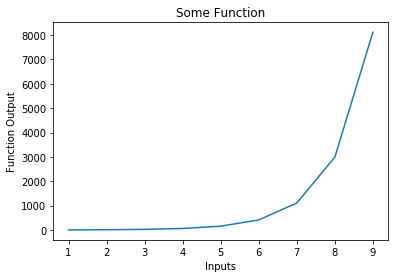

In [31]:
plt.plot(input_list, output_list) # plot input_list on x-axis, output_list on y-axis
plt.title('Some Function') # optionally specify a title for the plot
plt.xlabel('Inputs') # optionally specify a title for the x-axis
plt.ylabel('Function Output') #optionally specify a title for the y-axis

Next, we want to be able to create **variables** as a part of our computational graph. Previously, when we defined a value with Tensorflow, it's value couldn't really be changed - it was specified as a `tf.constant` or specified once as an argument into `feed_dict`. As Adit discussed, with machine learning we want to be able to change the weights in our function over time as we train our model. The `tf.Variable` type helps us accomplish this!



### Creating Variables in Tensorflow

One way to create variables in tensorflow is with the ``` tf.Variable() ``` API. When creating variables, we usually want to provide a method of ** initializing ** the variable, and usually also want to mention the ** dimensionality ** of the variable (ie, do we wish to create a constant? Or do we wish to create a vector or matrix of a certain dimension?)

With Tensorflow, we need to explicitly ** intialize ** all of our variable by registering a variable initailizer, and running it within our session. This may sound a little complicated, but its just 2 lines of code. 


In [34]:
W = tf.Variable(tf.constant(0.1, shape = [10,1])) # create a variable with information on how to initialize it and its dimensionality

Placeholders (tensors that we've promised to give data to later) can also take on arbitrary shapes. Of course, if you set a placeholder with a certain dimensionality, it will later expect data of that dimensionality!

In [35]:
x = tf.placeholder(tf.float32, shape = [1, 10]) # think of this as one training example that has 10 features.

In [36]:
mat_mul = tf.matmul(x, W)

In [38]:
data = np.arange(10).reshape((1,10)) # 0,1,2,3...10 reshaped into a 1 * 10 matrix

# initialize our variables
init = tf.global_variables_initializer() # the variable initializer
sess.run(init)
sess.run(mat_mul, feed_dict = {x: data}) # can you predict the output? 

array([[ 4.5]], dtype=float32)

#### Exercise
Let's create a function that takes in a set of 5 vectors each with dimensionality 10, and multiplies it with a matrix W of dimensionality $ 10 * 5 $. What would we need to change in the code above? 

In [55]:
# TODO: define a variable W_matrix to be a variable that is initialized with the constant 0.1, but has dimensionality 10 * 5
W_matrix = tf.Variable(tf.constant(0.1, shape = [10, 5]))
# TODO: define a variable x_matrix to be a placeholder of shape 5 * 10.
x_matrix = tf.placeholder(tf.float32, shape = [5, 10])
# TODO: redefine the above mat_mul operation to use W_matrix and x_matrix.
mat_mul = tf.matmul(x_matrix, W_matrix)

# TODO: define a new variable initializer, and run it. 
init = tf.global_variables_initializer()
sess.run(init)



In [61]:
# TODO: create 50 arbitrary data points, and reshape them into a 5 * 10 matrix, so we can feed this into x as a placeholder.
data = np.arange(50).reshape((5, 10))
# TODO: run the function with sess.run(), and don't forget to pass in the argument for x_matrix!
ans = sess.run(mat_mul, feed_dict = {x_matrix: data})

### Recap
We've learned the very basics of tensorflow: how to represent the computational graphs, use placeholders to input data later, and create variables. It turns out that with these tools and a little knowledge about optimization in Tensorflow, we can easily implement many machine learning models. Let's get to it!

### Linear Regression

Linear regression can be thought of as the "hello world" of machine learning. It's relatively straigthforward to implement once you understand it, yet (unlike a simple "hello world" app) is powerful enough to have signficant use in industry. Let's take a look at the linear regression problem. 

We have some (input, output) pairs which we denote as $ (x_i, y_i) $ and we have $n$ of these, so $i \in [1...n]$. We want to learn a function $f: x \rightarrow{} y$ that maps inputs to outputs. 

Crucially, we want to learn the function $ f $ such that $ f $ generalizes well to **unseen** data. We can easily create a function $ f $ that always returns the correct answer on data we've seen before (data in our training set) - can you guess what that function would look like, and why it would be essentially worthless for data we haven't seen before? 

In [62]:
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA # to visualize our data
from sklearn.preprocessing import normalize # to standardize our data
from sklearn.model_selection import train_test_split
data, targets = load_boston(True)
data = normalize(data)
targets = targets.reshape((targets.shape[0],1)) # reshape targets to follow our variables
X_train, X_test, y_train, y_test = train_test_split(data, targets, 
                                                    test_size = 0.3, random_state = 42)

# TODO: what are the dimensionalities of our training and testing datasets and targets? 

#### Linear Regression: An overview

As discussed in the slides, we can teach a computer how to predict housing prices based on data. In order to do this, we will create a linear model in many dimensions (specifically, 13, the number of features in our dataset). 

Our goal is to learn a function $ f: x \rightarrow{} y$ that maps information about a house to the house's price prediction. With linear regression, our function $f$ is just a ** linear combination ** of our inputs. That means our output is just the sum of our inputs, but each of our inputs are weighted by some value: 

$$f(x) = w_1 x_1 + w_2 x_2 + ... w_{13}x_{13} + b = \sum_{j=1}^{13} w_j x_j + b$$

Next, we will initialize this linear model with initially random weights. As a result, our model won't be able to predict house prices very well at all. Learning is the process of adjusting these parameters so that our model's accuracy increases. In order to do this, we need to mathematically quantify how "bad" our model is currently. We can do this by calculating how off each prediction is from the actual value: 

$$ L = \frac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i))^2 $$

If we take the derivative of this function with respect to each of the weights $w$, we will know how much to "adjust" each weight $w$ by in order to make our function more accurate. This is an algorithm called ** gradient descent **. 

If you know some multivariable calculus, you can determine that the derivative with respect to the $i$th weight is $$ \frac{dL}{dw_i} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - f(x_i))x_i $$

This is getting a little abstract - lets move on to actually coding up this model!

In [8]:
# TODO: create placeholders for X and y, our features and tagets, respectively.

# TODO: create variables for W and b, and initialize them with constants.


In [ ]:

# TODO: use Tensorflow to write out the linear regression model and assign it to a variable y_pred.
# y_pred = ...
loss = tf.reduce_mean(tf.square(y_pred - y))
opt = tf.train.GradientDescentOptimizer(learning_rate = .5).minimize(loss)

In [ ]:
init = tf.global_variables_initializer()
sess.run(init)
initial_loss = loss.eval(feed_dict = {X: X_train, y: y_train})
print("initial loss: {}".format(initial_loss))
for i in range(5000):
    # TODO: run the optimization step with the training data passed in.
    if i % 100 == 0:
        # TODO: print the current error of the model so we can know how the model is doing while it is training
        print(loss.eval(feed_dict = {X: X_train, y: y_train}))

# TODO: evalute and print the final loss on the training and testing datasets.

In [ ]:
predictions = sess.run(y_pred, feed_dict = {X: data})
predictions = predictions.flatten()
targets = targets.reshape((506))

# lets take a look at some predictions
for i in range(10):
    randint = np.random.randint(0, 506)
    pred = predictions[randint]
    actual = targets[randint]
    print("prediction: {}, actual was: {}".format(pred, actual))


In [ ]:
# Lets plot the absolute differences as a function of the actual price
diffs = (targets - predictions)
avg_diffs = np.mean(diffs)
avg_houseprice = np.mean(targets)
plt.xlabel('Home price values')
plt.ylabel('Diff btwn targets and functions')
plt.scatter(targets, diffs)
plt.show()
print("average absolute difference: {}".format(avg_diffs * 1000))
print("average house price: {}".format(avg_houseprice * 1000))

Our model seems to do okay with lower and averaged price houses, but appears to do terribly with higher-priced houses. Think about why this may be. It's always important to consider the data that you used to train your model. In particular, it might be likely that our dataset didn't have many examples of highly priced houses, so our model may have not learned how to predict prices for them. What's cool about data science and machine learning is that we can easily test this theory. 

In [ ]:
limits = {0: 0, 10: 0, 20: 0, 30: 0, 40: 0, 50: 0}
for price in targets:
    limits[int(price/10) * 10]+=1

for k, v in sorted(limits.items()):
    print("{} : {}".format(k, v))

### Exercises

- As we have seen, our model is not very accurate for very highly-priced houses. How many higher-priced houses be different than lower-priced houses, and what did our model not capture about them? 


- Investigate the need for a bias unit in our linear model. How can you adjust our current model to not have the bias unit (hint: just remove it). What happens to the model if the bias unit is removed? Why is having a bias unit important in machine learning models?


- Investigate different learning rates other than 0.5. Anything under 0.5 should work well, but you may have to play around with the number of iterations. Why is this - why do some learning rates require more iterations while others do not? Try learning rates greater than 0.5, and observe what happens. Why do you think this is? What do you think are some good guidelines to pick an optimal learning rate? 



- Try ```Polynomial Regression```. This involves generating additional features that are combinations of the original features. In higher-dimensional space, the house price and newly generated features may be linear with respect to each other. To do this, you'll have to use the ```sklearn.preprocessing.PolynomialFeatures``` library to generate new features. Instead of 13, you'll also have to update your model to take in the new number of features you have created. 


- Do something interesting: If you have any ideas to change the model up or improve accuracy in some way, fork this repository and make your changes. Then post it on the AI at UCLA page for us to see! Also, don't forget to create a pull request on our github if you want your change merged into our tutorials. 

Thank you for attending! Please fill out our [feedback form](https://goo.gl/forms/pLOfAMpspqeqAkB12) so we can produce even better content!